# Definition

## Project Overview

## Problem Statement

## Metrics

# Analysis

## Data Exploration

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import pixiedust


%matplotlib inline

import plot_helper

Pixiedust database opened successfully


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The data set for this project was downloaded from Kaggle at  
[8anu climbing logbook](https://www.kaggle.com/dcohen21/8anu-climbing-logbook)

In [3]:
# Connect to db
conn = sqlite3.connect('data/8anu.sqlite')

# Read data into pandas
sql = ('SELECT a.id, a.country AS crag_country, a.crag_id, a.crag, a.sector_id, a.sector, a.name AS route, '
       'a.grade_id, g.fra_routes AS grade, a.year, a.date, a.method_id, m.shorthand AS method, a.notes, a.raw_notes, a.rating, '
       'a.user_id, u.country AS user_country, u.city AS user_city, u.sex, u.height, u.weight, u.birth AS birthdate, u.started AS started_climbing '
       'FROM ('
           'SELECT * '
           'FROM ascent '
           'WHERE crag=\'Frankenjura\' AND climb_type=0'
       ') AS a '
       'LEFT OUTER JOIN grade AS g ON a.grade_id=g.id '
       'LEFT OUTER JOIN method AS m ON a.method_id=m.id '
       'LEFT OUTER JOIN user AS u ON a.user_id=u.id '
       )
df = pd.read_sql_query(sql, conn)

# Close db connection
conn.close()

In [4]:
# Export to .csv for submitting Project Proposal to Udacity
#df.to_csv('data/8anu_franken.csv', sep=';')

In [5]:
# Export to .xlsx
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('data/8anu_franken.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

### General information about the data set

In [6]:
## Get a list of all columns
df.columns

Index(['id', 'crag_country', 'crag_id', 'crag', 'sector_id', 'sector', 'route',
       'grade_id', 'grade', 'year', 'date', 'method_id', 'method', 'notes',
       'raw_notes', 'rating', 'user_id', 'user_country', 'user_city', 'sex',
       'height', 'weight', 'birthdate', 'started_climbing'],
      dtype='object')

In [7]:
df.head(5)

,id,crag_country,crag_id,crag,sector_id,sector,route,grade_id,grade,year,...,raw_notes,rating,user_id,user_country,user_city,sex,height,weight,birthdate,started_climbing
0,582,DEU,16600,Frankenjura,126,Grüne Hölle,Isolation,46,6c+,2000,...,0,0,39,NLD,Eindhoven,0.0,178.0,78.0,1972-10-16,1996.0
1,805,DEU,16600,Frankenjura,111,Marientaler Wände,Kraftfeld,59,7c+,1999,...,0,0,32,SWE,Gothenburg,0.0,174.0,0.0,1976-06-15,1996.0
2,902,DEU,16600,Frankenjura,1309,Obere Schlossbergwände,Ursus,49,7a,2000,...,0,0,49,SWE,GÖTEBORG,0.0,0.0,0.0,None,1990.0
3,903,DEU,16600,Frankenjura,0,,Don't know name,46,6c+,2000,...,0,0,49,SWE,GÖTEBORG,0.0,0.0,0.0,None,1990.0
4,935,DEU,16600,Frankenjura,422,Richard Wagner Fels,Fight Gravity,53,7b,1999,...,0,0,3,SWE,Umeå,0.0,180.0,78.0,1973-09-09,1995.0


In [8]:
records_count = df.shape[0]
ratings_count = df[ df['rating'] == 0].shape[0]


f'There are {records_count:,} data entries in our dataset.'
f'{ratings_count:,} out of these contain a rating. That is approx. {ratings_count / records_count * 100:.2f}%'

'There are 114,589 data entries in our dataset.'

'60,303 out of these contain a rating. That is approx. 52.63%'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114589 entries, 0 to 114588
Data columns (total 24 columns):
id                  114589 non-null int64
crag_country        114589 non-null object
crag_id             114589 non-null int64
crag                114589 non-null object
sector_id           114589 non-null int64
sector              114589 non-null object
route               114589 non-null object
grade_id            114589 non-null int64
grade               114589 non-null object
year                114589 non-null int64
date                114589 non-null int64
method_id           114589 non-null int64
method              114589 non-null object
notes               114589 non-null object
raw_notes           114589 non-null int64
rating              114589 non-null int64
user_id             114589 non-null int64
user_country        114587 non-null object
user_city           114587 non-null object
sex                 114587 non-null float64
height              114587 non-null fl

| <p align='left'>`Column` | <p align='left'>Description | <p align='center'> Datatype | <p align='center'> Use | 
|:------|:------|:------:|:------:| 
| <p align='left'>`crag_country` | <p align='left'>3-letter country code of the country where the crag is located. | <p align='center'> categorical | <p align='center'> no | 
| <p align='left'>`crag_id` | <p align='left'>Unique id for identifying each crag. | <p align='center'> int | <p align='center'> no | 
| <p align='left'>`crag` | <p align='left'>Name of the crag | <p align='center'> text | <p align='center'> no | 
| <p align='left'>`sector_id` | <p align='left'>Unique id for identifying each sector. | <p align='center'> int | <p align='center'> yes | 
| <p align='left'>`sector` | <p align='left'>Name of the sector. A sector is a specific area within a crag. | <p align='center'> text | <p align='center'> yes | 
| <p align='left'>`route` | <p align='left'>Name of the route the climber has climbed. | <p align='center'> text | <p align='center'> yes | 
| <p align='left'>`grade_id` | <p align='left'>Unique id for identifying each climbing grade. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`grade` | <p align='left'>Climbing grade given to that route as per the French grading system | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`year` | <p align='left'>Year the route was climbed | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`date` | <p align='left'>Date the route was climbed. The date format is number of seconds since 1970-01-01. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`method_id` | <p align='left'>Unique id for identifying each type of ascent. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`method` | <p align='left'>The type of ascent the climber made on that route. | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`notes` | <p align='left'>Additional information the climber provided for this climb, e.g. Soft graded, i.e. fairly easy climb for the given grade | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`raw_notes` | <p align='left'>Encoding of different notes and combination of notes | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`rating` | <p align='left'>Rating given to the climb by this climber. This is our target attribute. | <p align='center'> int | <p align='center'> target | 
| <p align='left'>`user_id` | <p align='left'>Unique id for this climber. | <p align='center'> int | <p align='center'> yes | 
| <p align='left'>`user_country` | <p align='left'>3-letter country code of the country where this climber is from. | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`user_city` | <p align='left'>City where this climber is from | <p align='center'> text | <p align='center'> statistics | 
| <p align='left'>`sex` | <p align='left'>The climber's sex. 0 indicates male, 1 indicates female. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`height` | <p align='left'>The climber's height in cm | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`weight` | <p align='left'>The climber's weight in kg | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`birthdate` | <p align='left'>The climber's date of birth | <p align='center'> date | <p align='center'> statistics | 
| <p align='left'>`started_climbing` | <p align='left'>The year the climber started climbing. | <p align='center'> int | <p align='center'> statistics | ![image.png](attachment:image.png)

In the table above the column `Use` indicated how we plan to use the given column.
- `target` - this is a target attribute.
- `yes` - this column will be used during exploration and analysis.
- `no` - not planned to use that column during analysis and exploration.
- `statistics` - this column will not be used for analysis but may be interesting later on to do user statistics etc.

Drop unnecessary columns for analysis.

In [10]:
df = df.drop(columns=['crag_country',
                      'crag_id',
                      'crag',
                      'grade_id',
                      'grade',
                      'year',
                      'date',
                      'method_id',
                      'method',
                      'notes',
                      'raw_notes',
                      'user_country',
                      'user_city',
                      'sex',
                      'height',
                      'weight',
                      'birthdate',
                      'started_climbing'])

Split train and test set to avoid bias

In [11]:
from sklearn.model_selection import train_test_split

# y = df.pop('rating')
X = df

X_train, X_test = train_test_split(X, test_size=0.2)

### Missing values

Let us take a look if we have **missing values** or **zero values**.

Number of missing values per column:

In [12]:
X_train.isnull().sum()
# y_train.isnull().sum()

id           0
sector_id    0
sector       0
route        0
rating       0
user_id      0
dtype: int64

Number of zero values per column:

In [13]:
(X_train == 0).sum()
# (y_train == 0).sum()

id               0
sector_id    12248
sector           0
route            0
rating       48175
user_id          0
dtype: int64

### Unique values

A naive estimate on the number of unique sectors and routes within these sectors. Submitted by a number of distinct users.

In [14]:
X_train[['sector_id', 'route', 'user_id']].nunique()

sector_id      351
route        12475
user_id       3305
dtype: int64

Why do we call the above estimate _naive_? 

According to (climb-europe.com)[http://www.climb-europe.com/RockClimbingGermany/RockClimbingFrankenjura.html] _there are approximately 1,000 crags spread out in a beautiful forest terrain_ (Note that _crags_ in the above quote is the same as _sectors_ in our dataset.) This seems fine since in our dataset there are 351 different sectors noted.

In the article it continues to claim that _Frankenjura boasts in excess of 10,000 routes._ Now this is where we should get a little suspicious. In only 350 sectors our dataset apparently contains already more than 12,000 routes - which is well above the 10,000 mentioned in the article.

Lets dig deeper here.


What are the records where `sector_id` is 0?  
We take a look at a number of samples.

In [15]:
X_train[X_train['sector_id'] == 0].head(10)

,id,sector_id,sector,route,rating,user_id
54794,2869301,0,,Schöne Absicht,3,26302
30579,1748292,0,,Applauskurve,2,10955
11744,756893,0,Waldgeist,Hexenriss,1,9215
45906,2488121,0,,Alles is gut,0,43151
23093,1386950,0,Röthelfels - Versteckte Wand,Weg der Röthelzwerge,0,18696
28866,1698162,0,Sonnenuhr,Timesquare,2,10384
46341,2500252,0,Bitzenstein,Zwergentest,1,5512
108578,4786142,0,Naturfreundefels,Mr. Pumpkinhead,2,66305
67287,3343317,0,Topfstein,Martini,0,31630
113427,4889826,0,,Desperado,0,39981


## Exploratory Visualization

### Missing values

Lets look at the **Missing** or **Zero values** per column.

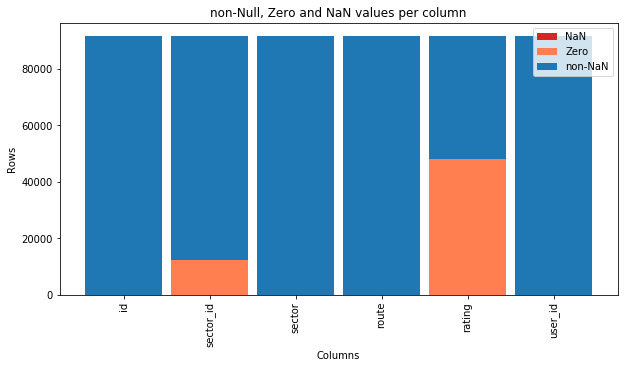

In [16]:
plot_helper.missing_values_overview(X_train)

In our data set `0` is in indicator for missing values, except for `sex` where `0` indicates `male` (and `1` for `female`).

From the graph above we can conclude that we have missing data in `sector_id`, `raw_notes`, `rating`, `height`, `weight`, `birth`, `started_climbing`.

Since `sector_id` and `rating` are important for our analysis, we have to consider what to do about those missing values during Data Preparation later on.

## Analysis of our target variable `rating`

What are the unique values of our target variable?

In [17]:
y_train = X_train['rating']
y_train.unique()

array([0, 1, 3, 2])

And how is their distribution?


In [18]:
percentages = round(y_train.value_counts().sort_index() / y_train.count() * 100, 1)
percentages

0    52.6
1    11.1
2    18.8
3    17.5
Name: rating, dtype: float64

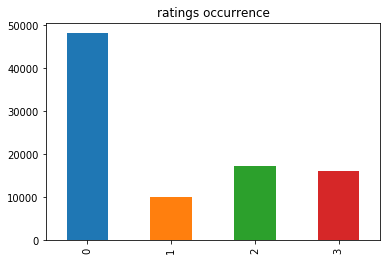

In [19]:
y_train.value_counts().sort_index().plot(
    kind='bar', title='ratings occurrence', xticks=percentages)

In [20]:
y_train[y_train != 0].describe()

count    43496.000000
mean         2.134610
std          0.765007
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: rating, dtype: float64

Out of those climbs, that were rated, the average is 2.14.

What is the percentage of users that rated at least one climb?

In [21]:
(X_train.groupby('user_id')['rating'].sum() == 0).value_counts()

False    2246
True     1059
Name: rating, dtype: int64

This means that approx. 2/3 of users have rated at least one item.

How many ratings are there per user?

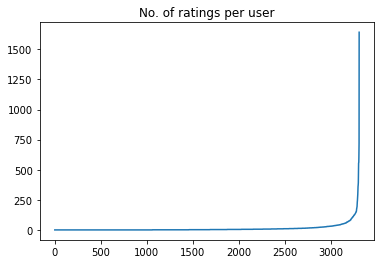

In [22]:
ratings_per_user = X_train.groupby('user_id')['rating'].apply(lambda x: x[x != 0].count())
ratings_per_user.sort_values().plot(
    kind='line', title='No. of ratings per user', use_index=False)

From the above plot we can see that there must be one or several outliers with a large number of ratings (around 1600). Let's apply the logarithm on the y-axis.

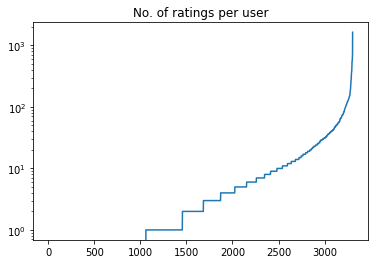

In [23]:
ratings_per_user.sort_values().plot(
    kind='line', title='No. of ratings per user', use_index=False, logy=True)

Now, this has more information. We can see that approx. 30% of users gave no rating at all. And more than 90% of users gave less than 200 ratings.

Let's look at the percentiles information in detail to confirm this.

In [24]:
ratings_per_user.describe(percentiles=[.25, 0.33, .50, .75, .90, .95, .99])

count    3305.000000
mean       13.160666
std        49.511701
min         0.000000
25%         0.000000
33%         1.000000
50%         2.000000
75%         9.000000
90%        29.000000
95%        52.800000
99%       150.000000
max      1642.000000
Name: rating, dtype: float64

## Algorithms and Techniques

## Benchmark

# Methodology

## Data Preprocessing

Remove records from dataset where `sector_id == 0`

In [25]:
X_train = X_train[X_train['sector_id'] != 0]

In [26]:
# TODO
# Consolidate sectors, e.g. sector_id: 839, 12382

### Consolidate route names, remove duplicates

Since our data set does not provide a unique id for routes, we can only go by the name to identify a route. Unfortunately, there are many versions of route names as well as spelling mistakes. In order to arrive at a unique list of routes, we need to do some cleaning up.  

The following example illustrates that.

In [27]:
X_train[X_train['route'].str.startswith('Adr')].drop_duplicates(subset=['route'])['route']

108529      Adrspach Weg
86487     Adrschpach Weg
39147        Adrspachweg
8849        Adrspach weg
Name: route, dtype: object

Let's start by converting all route names to lowercase and removing special characters.

In [28]:
def string_cleaning(df, columns):
    '''Remove special characters and convert to lowercase. Apply to all columns as specified'''

    df[columns] = df[columns].applymap(lambda s: s.lower())

    # Need to use Series because regular replace() cannot handle RegEx
    for c in columns:
        df[c] = df[c].str.replace('[^A-Za-z\s]+', '') # TODO keep numbers??
        
        # Remove rows with empty values as they are unusable
        df = df[df[c] != '']

    return df

X_train = string_cleaning(X_train, ['route'])

Next, let's define a couple of functions that will help us to clean up duplicate route names within sectors.

In [30]:
# http://www.coli.uni-saarland.de/courses/LT1/2011/slides/Python-Levenshtein.html
from Levenshtein import jaro_winkler

def create_jaro_winkler(keys, prefix_weight=None):
    '''Calculates Jaro-Winkler-Distance among all items of `keys` and returns calculation results as a matrix'''

    # TODO  is there a more pythonic way of calculating this matrix?
    
    jaro_winkler_matrix = np.ones((len(keys), len(keys)))

    i = 0
    while i <= len(keys) - 1:
        j = 0
        while j <= len(keys) - 1:
            if i != j:
                jaro_winkler_matrix[i][j] = jaro_winkler(
                    keys[i], keys[j]) if prefix_weight is None else jaro_winkler(keys[i], keys[j], prefix_weight)
            j += 1
        i += 1

    return jaro_winkler_matrix

def remove_overlap(d):
    '''Resolve 'paths' within the dictionary, e.g. 
     { A : B, B : C }  ->  { A : C, B : C }
     Returns cleaned dictionary'''

    set_keys = set(d.keys())
    set_values = set(d.values())
    set_intersect = set_keys.intersection(set_values)

    for v in set_intersect:
        new_target = d[v]

        filtered_dict = {key: new_target for (
            key, value) in d.items() if value == v}
        filtered_dict

        for i, j in d.items():
            if i in filtered_dict.keys():
                d[i] = filtered_dict[i]

    return d

In [31]:
def get_routes_per_sector(df, sector_id):
    '''Returns a series with route names as labels and count of route name occurrences as values'''

    df_one_sector = df[df['sector_id'] == sector_id]
    return df_one_sector['route'].value_counts()

def clean_route_names_sector(df, sector_id, threshold=0.9, prefix_weight=1/100, debug=False):
    '''Replaces route name within given `sector_id` with the most similar matching name that has the most occurrences.'''

    routes_per_sector = get_routes_per_sector(df, sector_id)
    keys = routes_per_sector.keys()
    values = routes_per_sector.values

    # Create Jaro-Winkler-Matrix and fill diagonal with zeros, 
    # otherwise max value will always be 1.0 (as diagonal is always 1.0)
    jaro_winkler_matrix = create_jaro_winkler(keys, prefix_weight)
    np.fill_diagonal(jaro_winkler_matrix, 0)

    # empty nested dictionary, for replacements of similar route names
    replacements = {'route': {}}

    # find max count of values above threshold
    indices_above_threshold = np.transpose(
        np.nonzero(jaro_winkler_matrix >= threshold))

    first_values = [t[0] for t in indices_above_threshold]
    unique_first_values = np.unique(first_values)

    for u in unique_first_values:
        tuples_list = [t for t in indices_above_threshold if t[0] == u]
        counts_list = [values[t2[1]] for t2 in tuples_list]
        val_max = max(counts_list)
        index_max = counts_list.index(max(counts_list))
        keys[tuples_list[index_max][1]]

        if values[u] < values[tuples_list[index_max][1]]:
            replacements['route'][keys[u]] = keys[tuples_list[index_max][1]]
            if debug:
                print(
                    f'Replacement: {keys[u]}({values[u]}) : {keys[tuples_list[index_max][1]]}({values[tuples_list[index_max][1]]}) ')        

    # Resolve overlaps in replacements
    replacements['route'] = remove_overlap(replacements['route'])
        
    # Replace all found similar route names
    df.loc[df['sector_id'] == sector_id] = df.replace(
        to_replace=replacements)

    return df

def clean_route_names(df):
    '''Cleans up duplicate route names within sectors.'''
    
    for sid in df['sector_id'].unique():
        df = clean_route_names_sector(df, sid)
    return df   

In [32]:
X_train = clean_route_names(X_train)

In [34]:
jaro_winkler('adrschpach weg', 'adrspach weg', 1/100)
df_temp[df_temp['route'].str.startswith('adr')]

0.900952380952381

NameError: name 'df_temp' is not defined

Extract all the individual routes

In [ ]:
X_train_routes = X_train[['sector_id', 'sector', 'route']].drop_duplicates()
X_train_routes.head(10)

In [ ]:
X_train_routes.reset_index(inplace=True, drop=True)
# X_train_routes = X_train_routes.drop(columns=['index'])
X_train_routes.head(10)

## Implementation

## Refinement

# Results

## Model Evaluation and Validation

## Justification

# Conclusion

## Free-Form Visualization

## Reflection

## Improvement